In this notebook we try to create a semi automatic way to find a perfect trapazoidal for finding the corner points of the presepctive transformation.

In [118]:
from skimage.color import rgb2hsv
from ipywidgets import IntSlider
import matplotlib.pyplot as plt
import skimage.io as io
import cv2

In [121]:
fig = io.imread("../images/road (4).jpg")
H, W, _ = fig.shape

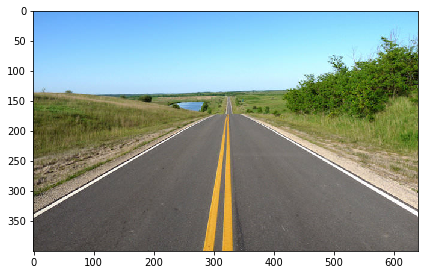

In [122]:
io.imshow(fig)
plt.show()

In [105]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import numpy as np

# Initial parameters
bottom_width = int(W/8)
top_width = int(W/5)
vertical_position = int(H/2)
line_distance = int(H/5)
horizontal_position = int(W/2)

p1 = np.zeros((2, 1))
p2 = np.zeros((2, 1))
p3 = np.zeros((2, 1))
p4 = np.zeros((2, 1))

# Function to update the plot based on the slider values
def update_trapezoid(bottom_width, top_width, vertical_position, line_distance,
                     horizontal_position, rotation):
    global p1, p2, p3, p4
    # Convert degrees to radians for rotation
    theta_cw = np.radians(rotation)
    
    # update points based on sliders values
    x1 = horizontal_position - bottom_width / 2
    x2 = horizontal_position + bottom_width / 2
    x4 = horizontal_position - top_width / 2
    x3 = horizontal_position + top_width / 2
    y1 = vertical_position
    y2 = vertical_position
    y4 = vertical_position + line_distance
    y3 = vertical_position + line_distance
    
    # Rotation matrix for clockwise and counterclockwise rotation
    rot = np.array([[np.cos(theta_cw), -np.sin(theta_cw)],
                       [np.sin(theta_cw), np.cos(theta_cw)]])
    
    # Apply rotation transformation to trapezoid vertices
    p1 = np.dot(rot, np.array([[x1], [y1]]))
    p2 = np.dot(rot, np.array([[x2], [y2]]))
    p3 = np.dot(rot, np.array([[x3], [y3]]))
    p4 = np.dot(rot, np.array([[x4], [y4]]))
    
    # Plot the rotated trapezoid
    plt.figure(figsize=(6, 6))
    plt.imshow(fig)
    plt.plot([p1[0], p2[0], p3[0], p4[0], p1[0]], [p1[1], p2[1], p3[1], p4[1], p1[1]], 'b-')
    plt.scatter([x1, x2, x3, x4], [y1, y2, y3, y4], color=['red', 'blue', 'green', 'yellow'])
    plt.ylim(H, 0)
    plt.xlim(0, W)
    plt.show()

# Create sliders for controlling the trapezoid parameters and rotation angles
interact(update_trapezoid,
         bottom_width=FloatSlider(min=1, max=W, step=0.1, value=bottom_width, description='Top Width:'),
         top_width=FloatSlider(min=1, max=W, step=0.1, value=top_width, description='Bottom Width:'),
         vertical_position=FloatSlider(min=1, max=H, step=0.1, value=vertical_position, description='Vertical Position:'),
         line_distance=FloatSlider(min=1, max=H, step=0.1, value=line_distance, description='Line Distance:'),
         horizontal_position=FloatSlider(min=0, max=W, step=0.1, value=horizontal_position, description='Horizontal Position:'),
         rotation=FloatSlider(min=-360, max=360, step=10, value=0, description='Rotation (degrees):'),
        )


interactive(children=(FloatSlider(value=80.0, description='Top Width:', max=640.0, min=1.0), FloatSlider(value…

<function __main__.update_trapezoid(bottom_width, top_width, vertical_position, line_distance, horizontal_position, rotation)>

In [111]:
def perspective_transformation(img, pts_source):
        """Returns perspective transformation of an image."""
        if(len(img.shape) == 2):
                H, W = img.shape
        else:
                H, W, _ = img.shape
                
        # Define source points, points are defined as (col, row)
        d_top_left = (0, 0)
        d_top_right = (W-1, 0)
        d_bottom_left = (0, H - 1)
        d_bottom_right = (W - 1, H - 1)
        
        pts_destination = np.array([d_top_left, d_top_right, d_bottom_right, d_bottom_left], dtype=np.float32)
        
        # Get perspective transformation matrix
        matrix = cv2.getPerspectiveTransform(pts_source, pts_destination)
        
        # Apply perspective transformation
        transformed_img = cv2.warpPerspective(img, matrix, (W, H))
        return transformed_img, matrix

In [114]:
pts_source = np.array([p1, p2, p3, p4], dtype=np.float32).reshape(4, 2)
transformed_img, matrix = perspective_transformation(fig, pts_source)

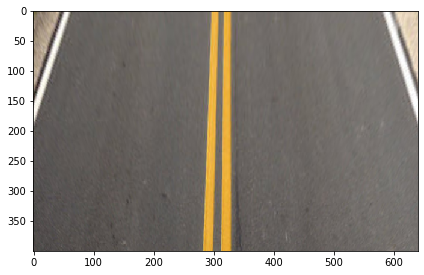

In [116]:
io.imshow(transformed_img)
plt.show()

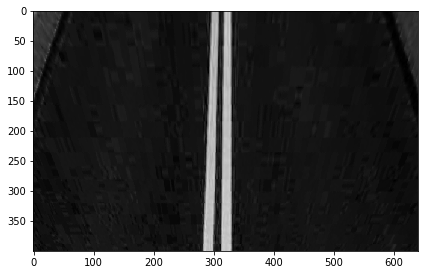

In [138]:
transformed_img_hsv = rgb2hsv(transformed_img)
io.imshow(transformed_img_hsv[:, :, 1])
plt.show()

# **Done!**